<figure style="float:right">
<a href="http://c51.lbl.gov/~walkloud/callat/">
    <img
    src="callat_logo.png"
    width="150"
    alt="CalLat logo"
    /img>
</a>
</figure>

# Jupyter notebook for CalLat gA project:

# sample correlation function fitter 

This notebook

## Import libraries

In [1]:
%load_ext autoreload

In [2]:
from __future__ import print_function
%autoreload
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import tables as h5
import h5py
import scipy as sp
import numpy as np
np.set_printoptions(linewidth=180)
import fit_functions as fit_fh
import iminuit as mn
import itertools
import random
import tqdm
import theano as th
import theano.tensor as Tn
import fh_fit as fh
import fit_params as fitp
print("python  version:", sys.version)
print("numpy   version:", np.__version__)
print("scipy   version:", sp.__version__)
print("iminuit version:", mn.__version__)

python  version: 3.9.0 (default, Nov 15 2020, 14:28:56) 
[GCC 7.3.0]
numpy   version: 1.22.3
scipy   version: 1.7.3
iminuit version: 2.18.0


**NOTE:** at the time of writing this notebook, iminuit v1.2 raises complaints about the positive definiteness of the chisq function.  v1.1.1 does not raise these warnings.  v1.1.1 results have been check against independent analysis.  The v1.2 results seem to be consistent with those from v1.1.1

## Override default analysis parameters

In [42]:
#dfile = 'callat_gA.h5'
#ens = 'a12m310'
dfile = 'callat_gA_corrs.h5'
ens = 'a12m310XL'
params = fitp.params
override = True
params['bs'] = False
if override:
    params[ens] = dict()
    params[ens]['seed'] = ens
    params[ens]['Nbs']  = 5000
    params[ens]['t_min_max'] = {
        'proton':[4,22],
        'gA'    :[3,13],
        'gV'    :[5,22]
    }
    params[ens]['plt_range'] = {
        'proton':[4,23,0.62,0.76],
        'gA'    :[1,23,1.1,1.6],
        'gV'    :[2,22,0.98,1.06]
    }
    params[ens]['fit_ini'] = {
        'E_0'   :0.6606,
        'dE_10' :0.5110,
        'gA_00' :1.24,
        'gA_11' :1.10,
        'gA_10' :0.183,
        'gV_00' :1.02,
        'gV_11' :1.06,
        'gV_10' :-0.195,
        'zs_0'  :1.51e-3,
        'zp_0'  :5.73e-3,
        'zs_1'  :1.59e-3,
        'zp_1'  :1.09e-2,
        'dAss_0':-3.32e-6,
        'dAps_0':-1.63e-5,
        'dAss_1':2.93e-7,
        'dAps_1':-1.89e-6,
        'dVss_0':3.36e-6,
        'dVps_0':1.59e-5,
        'dVss_1':-3.29e-7,
        'dVps_1':2.09e-6,
    }

In [43]:
min_fh = fh.fit(dfile,ens,params)

chi^2 = 241.6175, dof = 76, chi^2/dof = 3.1792, Q=0.0000
gA = 1.2326, gAerr = 0.0036, gV = 1.0177,gVerr = 0.0003


In [47]:
min_fh = fh.fit(dfile,ens,params)

chi^2 = 39.8550, dof = 28, chi^2/dof = 1.4234, Q=0.0681
gA = 1.2413, gAerr = 0.0074, gV = 1.0190,gVerr = 0.0010


In [5]:
print(min_fh)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 179                        │             Nfcn = 7761              │
│ EDM = 7.21e-06 (Goal: 0.0002)    │            time = 5.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬────

{'E_0': 0.6596184895257937, 'dE_10': 0.5791670673840739, 'src_0': 0.0007597090535112312, 'snk_0': 0.0007597090535112312, 'src_1': 0.000907763533857681, 'snk_1': 0.000907763533857681} {'E_0': 0.6596184895257937, 'dE_10': 0.5791670673840739, 'src_0': 0.0007597090535112312, 'snk_0': 0.0028757763329525705, 'src_1': 0.000907763533857681, 'snk_1': 0.006359444933229077}


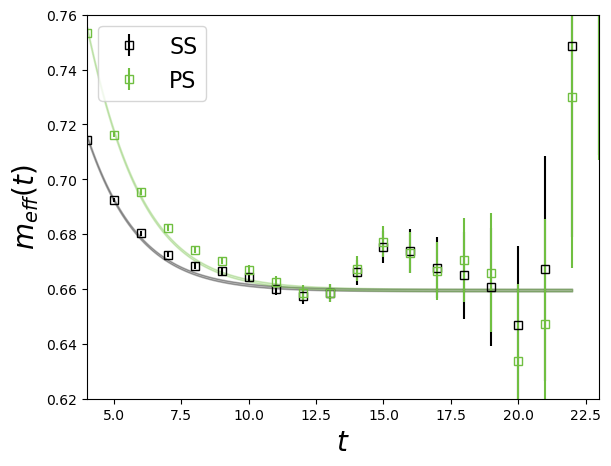

In [39]:
l_ss = ['E_0','dE_10','zs_0','zs_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1']
fh.plot_results(dfile,ens,params,min_fh,'proton',[l_ss,l_ps],'two_pt')

{'E_0': 0.6628962074460985, 'dE_10': 0.5282865824716261, 'src_0': 0.0007647047579071911, 'snk_0': 0.0007647047579071911, 'src_1': 0.0008108826992541911, 'snk_1': 0.0008108826992541911} {'E_0': 0.6628962074460985, 'dE_10': 0.5282865824716261, 'src_0': 0.0007647047579071911, 'snk_0': 0.0029004915136876474, 'src_1': 0.0008108826992541911, 'snk_1': 0.005682798562783764}


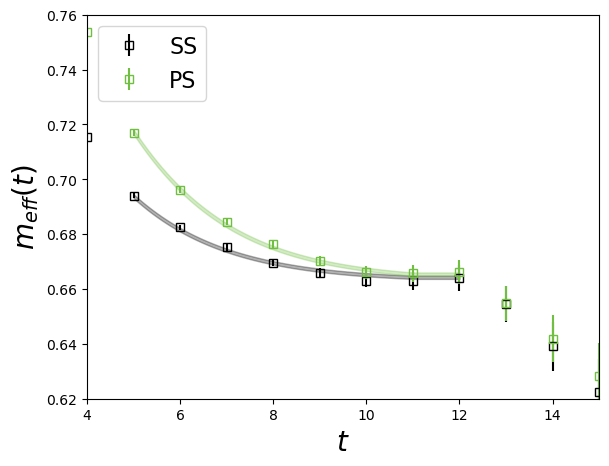

In [48]:
l_ss = ['E_0','dE_10','zs_0','zs_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1']
fh.plot_results(dfile,ens,params,min_fh,'proton',[l_ss,l_ps],'two_pt')

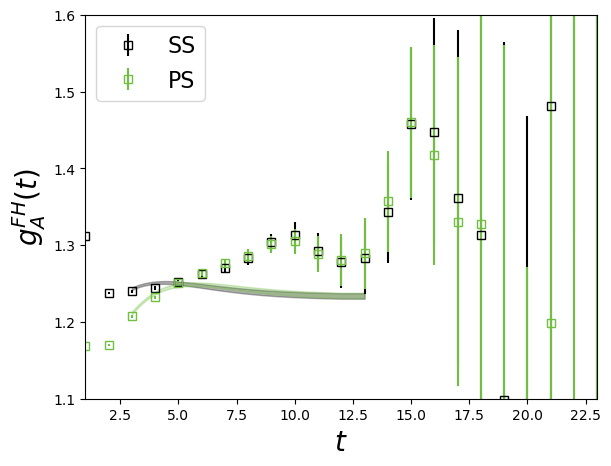

In [44]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gA_00','gA_11','gA_10','dAss_0','dAss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gA_00','gA_11','gA_10','dAps_0','dAps_1']
fh.plot_results(dfile,ens,params,min_fh,'gA',[l_ss,l_ps],'gA')

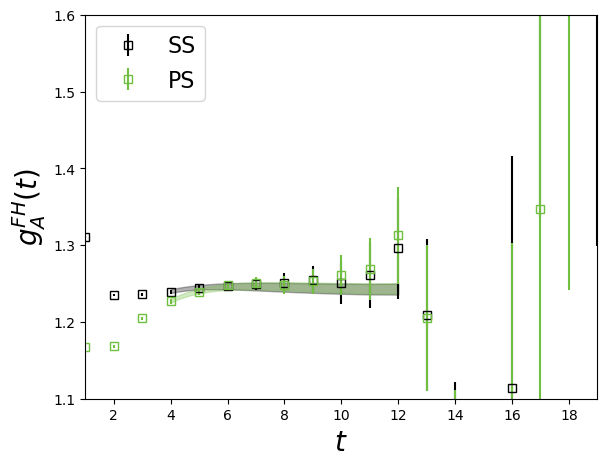

In [49]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gA_00','gA_11','gA_10','dAss_0','dAss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gA_00','gA_11','gA_10','dAps_0','dAps_1']
fh.plot_results(dfile,ens,params,min_fh,'gA',[l_ss,l_ps],'gA')

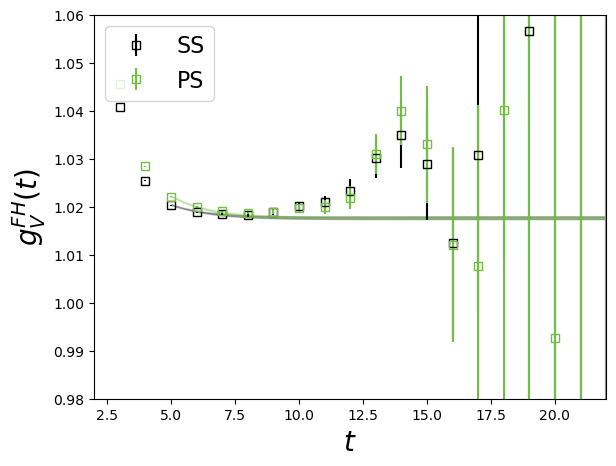

In [41]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gV_00','gV_11','gV_10','dVss_0','dVss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gV_00','gV_11','gV_10','dVps_0','dVps_1']
fh.plot_results(dfile,ens,params,min_fh,'gV',[l_ss,l_ps],'gV')

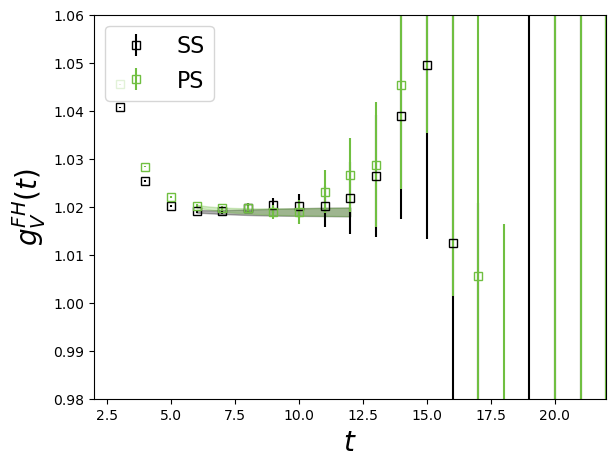

In [50]:
l_ss = ['E_0','dE_10','zs_0','zs_1','gV_00','gV_11','gV_10','dVss_0','dVss_1']
l_ps = ['E_0','dE_10','zs_0','zp_0','zs_1','zp_1','gV_00','gV_11','gV_10','dVps_0','dVps_1']
fh.plot_results(dfile,ens,params,min_fh,'gV',[l_ss,l_ps],'gV')

<center>
    <span style="color: black; font-family: Helvetica; font-size: 2em">
        These calculations are made possible by
    </span>
</center>

| | |
|:---:|:---:|
| [<img src='incite_logo.png' width='200'/>](http://www.doeleadershipcomputing.org/)  | [<img src='olcf_logo.png' width='320'/>](https://www.olcf.ornl.gov/) |
| [<img src='llnl_logo.png' width='640' />](https://hpc.llnl.gov/) | [<img src='scidac_logo.png' width='350' />](http://www.scidac.gov/) |